#Directories, Libraries and Data

In [1]:
#Directory
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
#Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [5]:
#Load the data
df=pd.read_csv('spam.csv')
df.head(5)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


#Analyzing the Data

In [7]:
#Summary Statistics

df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

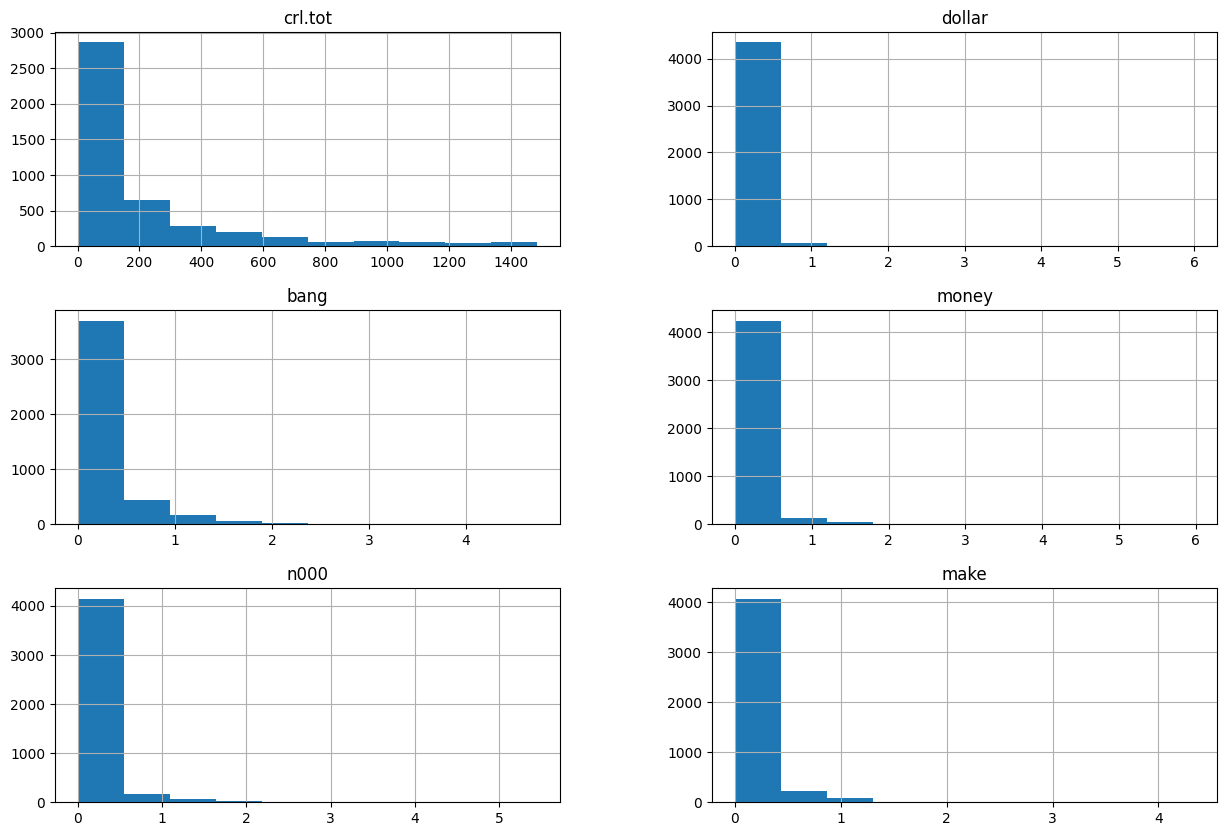

In [20]:
#histogram
df.hist(figsize=(15,10))

In [21]:
#Removing outliers
print(len(df))
df=df[df["crl.tot"]<1500]
df=df[df["bang"]<5]
df=df[df["money"]<6]
print(len(df))

4432
4432


<ipython-input-26-398e31065dee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

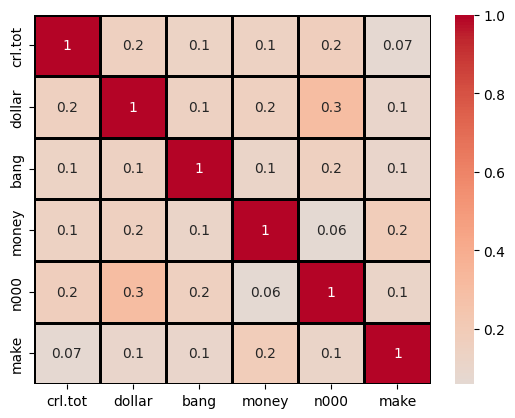

In [26]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidth=1,
            linecolor='black')

#Logistic regression preparation


In [27]:
#Prepare dependent variable
df["yesno"]=np.where(df["yesno"]=="y",1,0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [32]:
#prepare the X and y
y=df.yesno
X=df.iloc[:,:-1]
X=sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [34]:
#Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1502)

#Logistic Regression

In [36]:
#Logistic regression
#For each X unit increase, the probability of Y happening increases by exp(b)-1*100%
model=sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Aug 2023   Pseudo R-squ.:                  0.4210
Time:                        08:54:48   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [46]:
#Create the fuction
def logistic_reader(coefficient):
  probability=round((np.exp(coefficient)-1)*100,2)
  if probability>0:
    print("The likelihood increases by", probability, "%")
  elif probability==0:
    print("No Impact")
  else:
    print("The likelihood decreases by", probability, "%")

In [52]:
#Apply the function
logistic_reader(-0.5)

The likelihood decreases by -39.35 %


#Assess the mdel

In [56]:
#Predictions
predictions=model.predict(X_test)
predictions=np.where(predictions>0.5,1,0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [60]:
#Check if dataset in balanced
y_test.mean()

0.35400225479143177

#Confusion Matrix

In [64]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn,fp,fn,tp=confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [70]:
#Accuracy
accuracy=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy:", round(accuracy*100,1),"%")

#F1_Score
f1=2*tp/(2*tp+fn+fp)
print("F1_Score:", round(f1*100,1),"%")

#Specificity
specificity=tn/(tn+fp)
print("Specificity:", round(specificity*100,1),"%")

#Sensitivity
sensitivity=tp/(tp+fn)
print("Sensitivity:", round(sensitivity*100,1),"%")

Accuracy: 83.0 %
F1_Score: 73.7 %
Specificity: 91.4 %
Sensitivity: 67.5 %


#Classification Report

In [71]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887

